In [100]:
import pandas as pd

In [101]:
df = pd.read_csv('Downloads/Restaurant reviews.csv')

In [102]:
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN


In [103]:
df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')

In [104]:
df.drop(['Reviewer','Metadata', 'Time',
       'Pictures', '7514'], axis = 1, inplace = True)

In [105]:
df

,Restaurant,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4


In [106]:
df.isna().sum()

Restaurant     0
Review        45
Rating        38
dtype: int64

In [107]:
df.dropna(inplace = True)

In [108]:
df

,Restaurant,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4


In [109]:
df.isna().sum()

Restaurant    0
Review        0
Rating        0
dtype: int64

In [110]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/admin1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/admin1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/admin1/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [111]:
sw = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [112]:
def pre_pro(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in sw]
    return ' '.join(tokens)

In [113]:
df['Clean'] = df['Review'].apply(pre_pro)

In [114]:
df

,Restaurant,Review,Rating,Clean
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,ambienc good food quit good saturday lunch cos...
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,ambienc good pleasant even servic prompt food ...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,must tri great food great ambienc thnx servic ...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,soumen da arun great guy behavior sincereti go...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,food goodw order kodi drumstick basket mutton ...
...,...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3,madhumathi mahajan well start nice courteou se...
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,place never disappoint us food courteou staff ...
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,bad rate mainli chicken bone found veg food ac...
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4,person love prefer chines food coupl time husb...


In [115]:
df['Rating'].value_counts()

Rating
5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [116]:
df[df['Rating']=='Like'].index 

Index([7601], dtype='int64')

In [117]:
df.drop(index=df[df['Rating']=='Like'].index,inplace=True)

In [118]:
df['Rating'] = df['Rating'].apply(float)

In [119]:
df['Target'] =  df['Rating'].apply(lambda x :  0 if x>3.0 else 1)

In [120]:
df

,Restaurant,Review,Rating,Clean,Target
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,ambienc good food quit good saturday lunch cos...,0
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,ambienc good pleasant even servic prompt food ...,0
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,must tri great food great ambienc thnx servic ...,0
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincereti go...,0
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,food goodw order kodi drumstick basket mutton ...,0
...,...,...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3.0,madhumathi mahajan well start nice courteou se...,1
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,place never disappoint us food courteou staff ...,0
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,bad rate mainli chicken bone found veg food ac...,1
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4.0,person love prefer chines food coupl time husb...,0


In [121]:
df['Target'].value_counts()

Target
0    6315
1    3639
Name: count, dtype: int64

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
x = df['Restaurant'].astype(str) + ' ' + df['Clean'].astype(str)

In [124]:
y = df['Target']

In [125]:
tf_vec = TfidfVectorizer(max_features=1000)
x_tfidf = tf_vec.fit_transform(x)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [127]:
xtrain,xtest,ytrain,ytest = train_test_split(x_tfidf,y,test_size= 0.2,random_state=42)

In [128]:
lr = LogisticRegression()

In [129]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [131]:
ypred = lr.predict(xtest)

In [132]:
from sklearn.metrics import accuracy_score

In [136]:
acc= accuracy_score(ytest,ypred)
acc

0.8663987945755901

In [137]:
svm = SVC(kernel='rbf')

In [138]:
svm.fit(xtrain,ytrain)

SVC()

In [140]:
ypred1 = svm.predict(xtest)

In [141]:
acc1= accuracy_score(ytest,ypred1)
acc1

0.8679055750878956

In [142]:
gnb = GaussianNB()

In [144]:
gnb.fit(xtrain.toarray(),ytrain)

GaussianNB()

In [146]:
ypred2 = gnb.predict(xtest.toarray())

In [147]:
acc2= accuracy_score(ytest,ypred2)
acc2

0.796082370668006

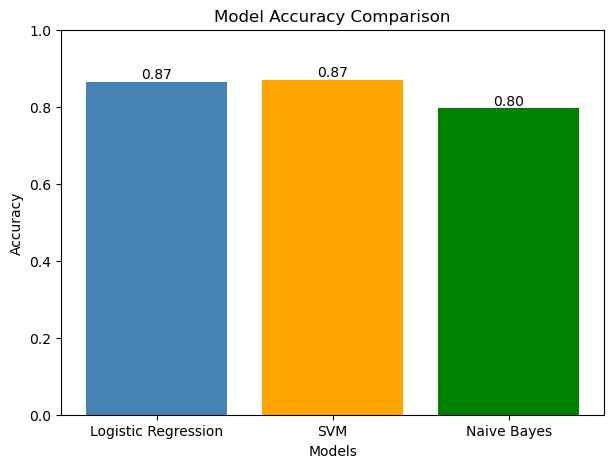

In [149]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [0.8653, 0.8699, 0.7960]  

plt.figure(figsize=(7,5))
bars = plt.bar(models, accuracies, color=['steelblue', 'orange', 'green'])

plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"{bar.get_height():.2f}",
             ha='center', va='bottom')

plt.show()
